# Bivariate Analysis

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

## Importing datasets

In [2]:
#Importing Temperature Dataset
temp = pd.read_csv("District91_TempAnalysis_1980_20.csv")
temp.head()

,DIST91_ID,NAME,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature
0,444.0,DADRA_&_NAGAR_HAVELI,DADRA_&_NAGAR_HAVELI,1980-01-01T00:00:00,303.363086,287.336563
1,446.0,DIU,DAMAN_&_DIU,1980-01-01T00:00:00,300.782562,290.148163
2,445.0,DAMAN,DAMAN_&_DIU,1980-01-01T00:00:00,299.633728,292.205414
3,447.0,DELHI,DELHI,1980-01-01T00:00:00,298.071065,274.780852
4,443.0,CHANDIGARH,CHANDIGARH,1980-01-01T00:00:00,296.485575,275.245342


In [3]:
#Importing AOD dataset
aod = pd.read_csv("aod_2005to2020.csv")
aod.head()

,system:index,DISTRICT,DT_CEN_CD,ST_CEN_CD,ST_NM,censuscode,date,mean
0,0_00000000000000000098,North Goa,1,30,Goa,585,01-01-2005,379.083341
1,0_0000000000000000011a,South Goa,2,30,Goa,586,01-01-2005,367.391576
2,0_00000000000000000005,Kamrup,22,18,Assam,321,01-01-2005,582.841071
3,0_00000000000000000006,Kamrup Metropolitan,23,18,Assam,322,01-01-2005,629.307266
4,0_00000000000000000012,Karbi Anglong,15,18,Assam,314,01-01-2005,410.451990


## Converting date formats

In [4]:
temp['date'] = pd.to_datetime(temp["date"]).dt.strftime('%Y-%m-%d')
temp.head()

,DIST91_ID,NAME,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature
0,444.0,DADRA_&_NAGAR_HAVELI,DADRA_&_NAGAR_HAVELI,1980-01-01,303.363086,287.336563
1,446.0,DIU,DAMAN_&_DIU,1980-01-01,300.782562,290.148163
2,445.0,DAMAN,DAMAN_&_DIU,1980-01-01,299.633728,292.205414
3,447.0,DELHI,DELHI,1980-01-01,298.071065,274.780852
4,443.0,CHANDIGARH,CHANDIGARH,1980-01-01,296.485575,275.245342


In [5]:
aod['date'] = pd.to_datetime(aod["date"]).dt.strftime('%Y-%m-%d')
aod.head()

,system:index,DISTRICT,DT_CEN_CD,ST_CEN_CD,ST_NM,censuscode,date,mean
0,0_00000000000000000098,North Goa,1,30,Goa,585,2005-01-01,379.083341
1,0_0000000000000000011a,South Goa,2,30,Goa,586,2005-01-01,367.391576
2,0_00000000000000000005,Kamrup,22,18,Assam,321,2005-01-01,582.841071
3,0_00000000000000000006,Kamrup Metropolitan,23,18,Assam,322,2005-01-01,629.307266
4,0_00000000000000000012,Karbi Anglong,15,18,Assam,314,2005-01-01,410.451990


## Filtering out required fields

In [6]:
temp = temp[["NAME","STATE_UT","date","maximum_2m_air_temperature","minimum_2m_air_temperature"]]
print("Temperature Dataset: ")
print(temp.describe().T)
print("\nHead:")
print(temp.head())

Temperature Dataset: 
                               count        mean       std         min  \
maximum_2m_air_temperature  313920.0  305.312709  6.727516  256.680261   
minimum_2m_air_temperature  313920.0  290.649739  8.663246  230.993570   

                                   25%         50%         75%         max  
maximum_2m_air_temperature  302.146497  305.421529  308.903133  323.298468  
minimum_2m_air_temperature  285.876636  293.336576  297.289406  302.341193  

Head:
                   NAME              STATE_UT        date  \
0  DADRA_&_NAGAR_HAVELI  DADRA_&_NAGAR_HAVELI  1980-01-01   
1                   DIU           DAMAN_&_DIU  1980-01-01   
2                 DAMAN           DAMAN_&_DIU  1980-01-01   
3                 DELHI                 DELHI  1980-01-01   
4            CHANDIGARH            CHANDIGARH  1980-01-01   

   maximum_2m_air_temperature  minimum_2m_air_temperature  
0                  303.363086                  287.336563  
1                  300.782562 

In [7]:
aod = aod[["DISTRICT","ST_NM","date","mean"]]
print("\nAOD Dataset: ")
print(aod.describe().T)
print("\nHead:")
print(aod.head())


AOD Dataset: 
        count        mean         std        min        25%         50%  \
mean  38346.0  573.006024  273.648393  19.658372  411.94408  531.020693   

             75%          max  
mean  686.939573  3940.005102  

Head:
              DISTRICT  ST_NM        date        mean
0            North Goa    Goa  2005-01-01  379.083341
1            South Goa    Goa  2005-01-01  367.391576
2               Kamrup  Assam  2005-01-01  582.841071
3  Kamrup Metropolitan  Assam  2005-01-01  629.307266
4        Karbi Anglong  Assam  2005-01-01  410.451990


## Making Datasets Uniform

In [8]:
aod['ST_NM'] = aod['ST_NM'].str.upper()
aod = aod.rename(columns={'ST_NM':'STATE_UT','mean':'AOD_mean'})
aod.head()

,DISTRICT,STATE_UT,date,AOD_mean
0,North Goa,GOA,2005-01-01,379.083341
1,South Goa,GOA,2005-01-01,367.391576
2,Kamrup,ASSAM,2005-01-01,582.841071
3,Kamrup Metropolitan,ASSAM,2005-01-01,629.307266
4,Karbi Anglong,ASSAM,2005-01-01,410.451990


## Cropping date range

In [9]:
def crop(df,start,end):
    mask = (df['date']>=start) & (df['date']<=end)
    return df[mask]

In [10]:
start = pd.to_datetime('2005-01-01')
end = pd.to_datetime('2019-12-01')

In [11]:
temp['date'] = pd.to_datetime(temp['date'])

temp_05_19 = crop(temp,start,end)

temp_05_19.head()

,NAME,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature
196200,DADRA_&_NAGAR_HAVELI,DADRA_&_NAGAR_HAVELI,2005-01-01,303.464032,286.473008
196201,DIU,DAMAN_&_DIU,2005-01-01,301.237396,289.928223
196202,DAMAN,DAMAN_&_DIU,2005-01-01,299.656952,291.064819
196203,DELHI,DELHI,2005-01-01,295.162199,278.977995
196204,CHANDIGARH,CHANDIGARH,2005-01-01,294.172162,278.056622


In [12]:
aod['date'] = pd.to_datetime(aod['date'])
aod_05_19 = crop(aod, start, end)
aod_05_19.head()

,DISTRICT,STATE_UT,date,AOD_mean
0,North Goa,GOA,2005-01-01,379.083341
1,South Goa,GOA,2005-01-01,367.391576
2,Kamrup,ASSAM,2005-01-01,582.841071
3,Kamrup Metropolitan,ASSAM,2005-01-01,629.307266
4,Karbi Anglong,ASSAM,2005-01-01,410.451990


## Grouping data

In [13]:
temp_st_avg = temp_05_19.groupby(["STATE_UT","date"]).mean().reset_index()
aod_st_avg = aod_05_19.groupby(["STATE_UT","date"]).mean().reset_index()

temp_goa = temp_st_avg[temp_st_avg["STATE_UT"]=="GOA"]
aod_goa = aod_st_avg[aod_st_avg["STATE_UT"]=="GOA"]

In [14]:
temp_goa.head()

,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature
1620,GOA,2005-01-01,303.652585,293.474574
1621,GOA,2005-02-01,304.045929,293.718666
1622,GOA,2005-03-01,303.967547,295.207613
1623,GOA,2005-04-01,305.541901,296.849751
1624,GOA,2005-05-01,305.040244,298.603507


In [15]:
aod_goa.head()

,STATE_UT,date,AOD_mean
533,GOA,2005-01-01,373.237458
534,GOA,2005-04-01,524.256071
535,GOA,2005-07-01,467.441401
536,GOA,2005-10-01,480.090491
537,GOA,2006-01-01,305.607830


## Plotting Graphs

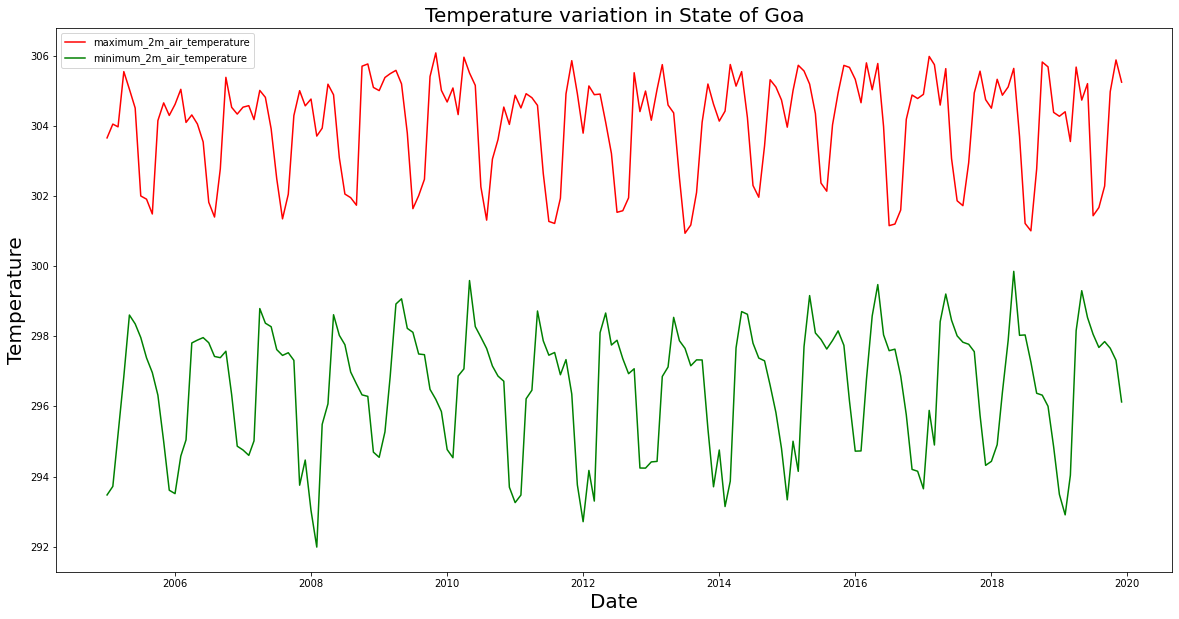

In [16]:
plt.figure(figsize = (20,10))
plt.title('Temperature variation in State of Goa',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Temperature',fontsize=20)

plt.plot(temp_goa["date"], temp_goa["maximum_2m_air_temperature"],color="red")
plt.plot(temp_goa["date"], temp_goa["minimum_2m_air_temperature"],color="green")
plt.legend(['maximum_2m_air_temperature','minimum_2m_air_temperature'])

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
#Converting data to numpy array
aod_goa_copy = np.asarray(aod_goa["AOD_mean"])
temp_goa_copy_mx = np.asarray(temp_goa["maximum_2m_air_temperature"])
temp_goa_copy_mn = np.asarray(temp_goa["minimum_2m_air_temperature"])

In [19]:
aod_goa_copy = aod_goa_copy.reshape(-1,1)
temp_goa_copy_mx = temp_goa_copy_mx.reshape(-1,1)
temp_goa_copy_mn = temp_goa_copy_mn.reshape(-1,1)

In [20]:
#Scaling data values in range (0,1)
sc = MinMaxScaler(feature_range=(0,1))
aod_goa_copy =  sc.fit_transform(aod_goa_copy)
temp_goa_copy_mx = sc.fit_transform(temp_goa_copy_mx)
temp_goa_copy_mn = sc.fit_transform(temp_goa_copy_mn)

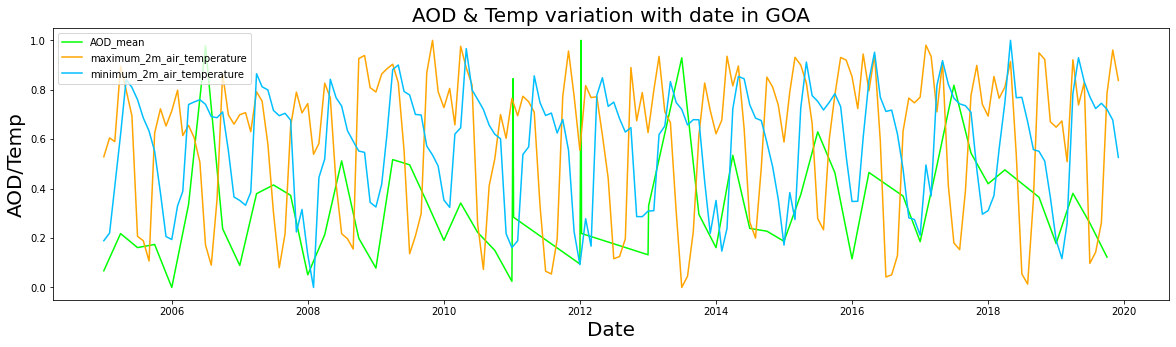

In [21]:
#Plotting AOD & Temp
plt.figure(figsize = (20,5))
plt.title('AOD & Temp variation with date in GOA',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('AOD/Temp',fontsize=20)

plt.plot(aod_goa["date"], aod_goa_copy,color="lime")

plt.plot(temp_goa["date"], temp_goa_copy_mx,color="orange")
plt.plot(temp_goa["date"], temp_goa_copy_mn,color="deepskyblue")

plt.legend(['AOD_mean','maximum_2m_air_temperature','minimum_2m_air_temperature'])

## Combining Datasets

In [22]:
df_merge = pd.merge(temp_st_avg, aod_st_avg, how ='inner', on = ['date','STATE_UT'])
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 898
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   STATE_UT                    899 non-null    object        
 1   date                        899 non-null    datetime64[ns]
 2   maximum_2m_air_temperature  899 non-null    float64       
 3   minimum_2m_air_temperature  899 non-null    float64       
 4   AOD_mean                    899 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 42.1+ KB


In [23]:
np.unique(df_merge['STATE_UT'])

array(['ASSAM', 'BIHAR', 'CHANDIGARH', 'GOA', 'GUJARAT', 'HARYANA',
       'KERALA', 'LAKSHADWEEP', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA',
       'MIZORAM', 'NAGALAND', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TRIPURA'],
      dtype=object)

In [24]:
df_merge.head()

,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature,AOD_mean
0,ASSAM,2005-01-01,298.563152,281.674727,475.148234
1,ASSAM,2005-04-01,304.493546,289.683522,616.707373
2,ASSAM,2005-07-01,307.127964,296.802419,312.401972
3,ASSAM,2005-10-01,305.170244,290.502501,194.972144
4,ASSAM,2006-01-01,300.205197,282.058817,633.177415


## Plotting Merged Dataset

In [25]:
kerala_mg = df_merge[df_merge['STATE_UT']=='KERALA']
kerala_mg.head()

,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature,AOD_mean
316,KERALA,2005-01-01,306.480622,292.778843,411.112358
317,KERALA,2005-04-01,307.466623,296.044105,493.014282
318,KERALA,2005-07-01,302.007156,295.457191,429.348609
319,KERALA,2005-10-01,303.294780,295.125777,502.387945
320,KERALA,2006-01-01,305.922031,292.552308,354.919975


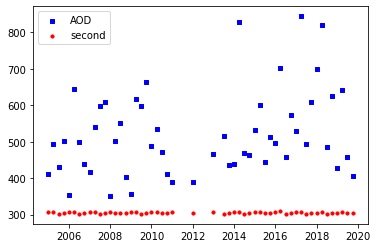

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(kerala_mg['date'], kerala_mg['AOD_mean'], s=10, c='b', marker="s", label='AOD')
ax1.scatter(kerala_mg['date'], kerala_mg['maximum_2m_air_temperature'], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

### Bivariate Analysis on Merged Dataset

<AxesSubplot:xlabel='AOD_mean', ylabel='maximum_2m_air_temperature'>

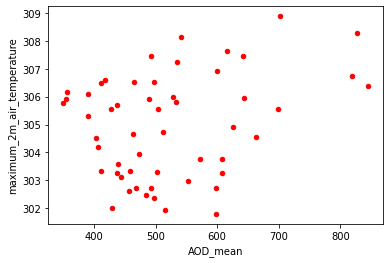

In [27]:
#ScatterPlots
kerala_mg.plot.scatter(x='AOD_mean', y='maximum_2m_air_temperature', color="red")

<AxesSubplot:xlabel='AOD_mean', ylabel='maximum_2m_air_temperature'>

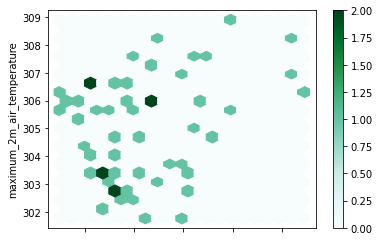

In [28]:
#HexPlots
kerala_mg.plot.hexbin(x='AOD_mean', y='maximum_2m_air_temperature', gridsize=20)

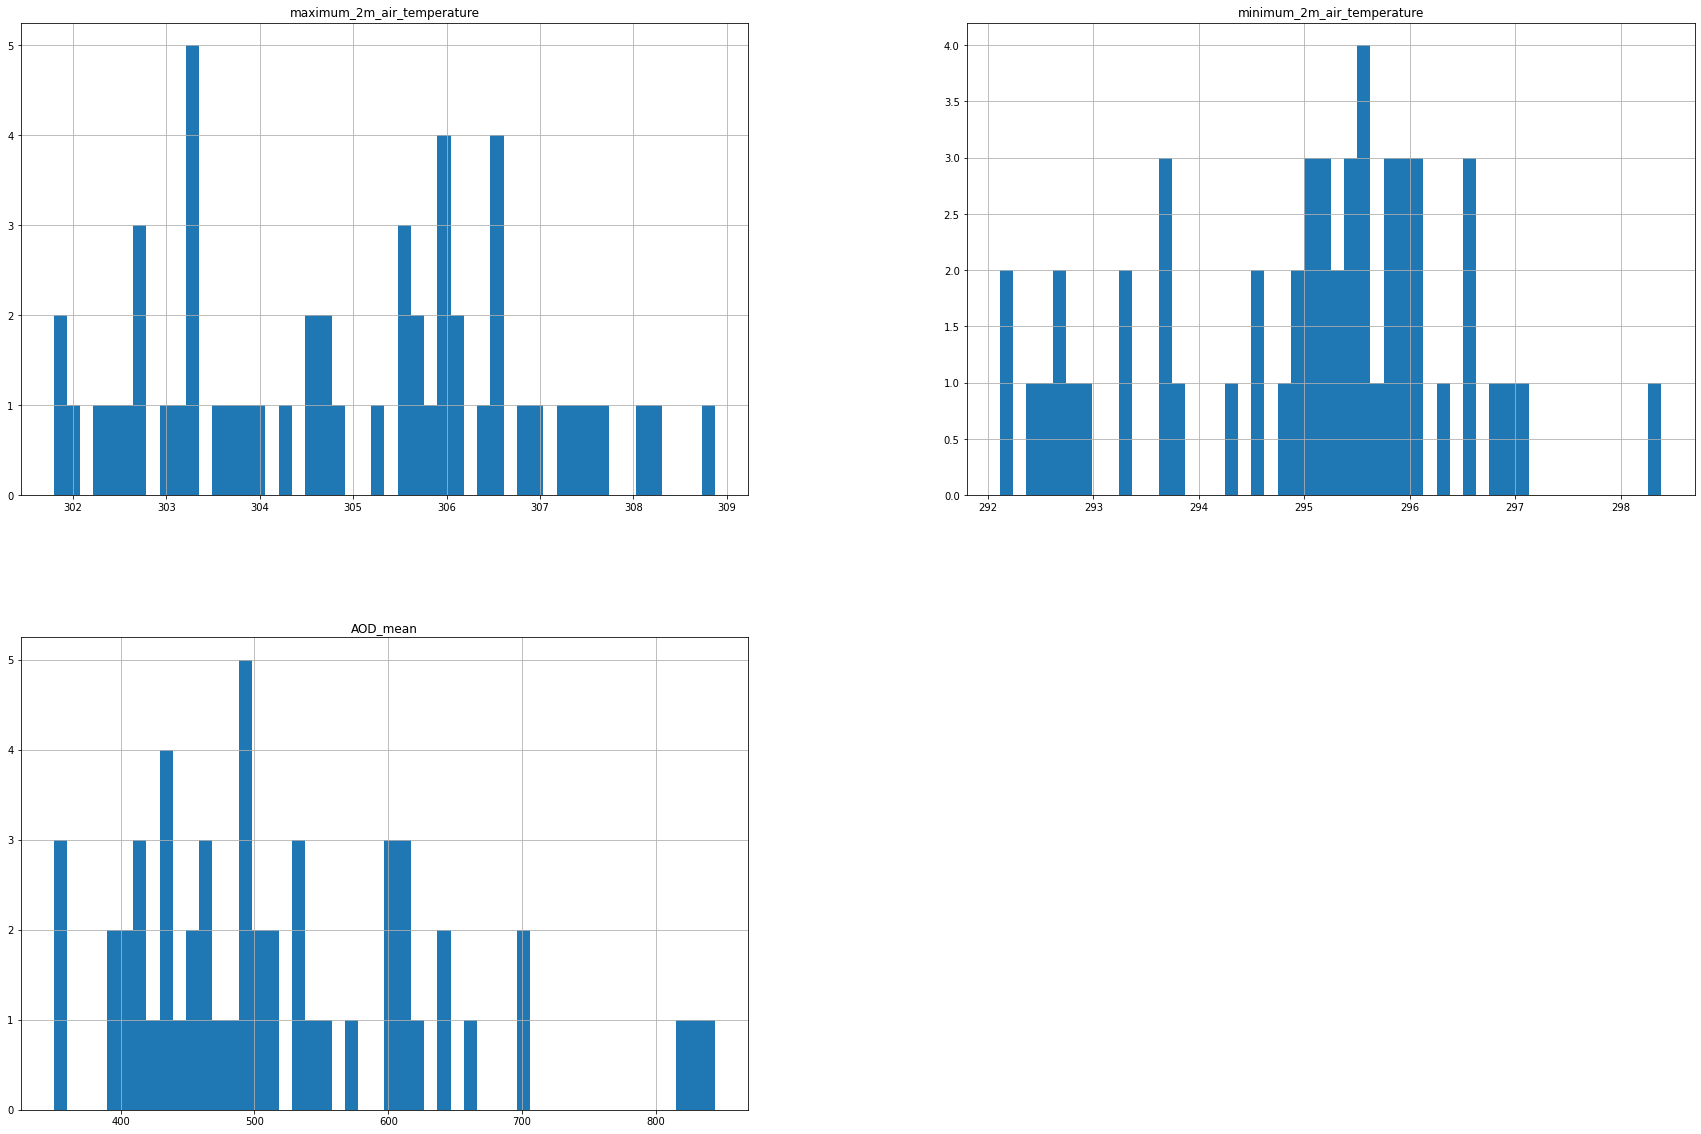

In [29]:
#Plotting data frequencies
kerala_mg.hist(bins=50, figsize=(30,20));

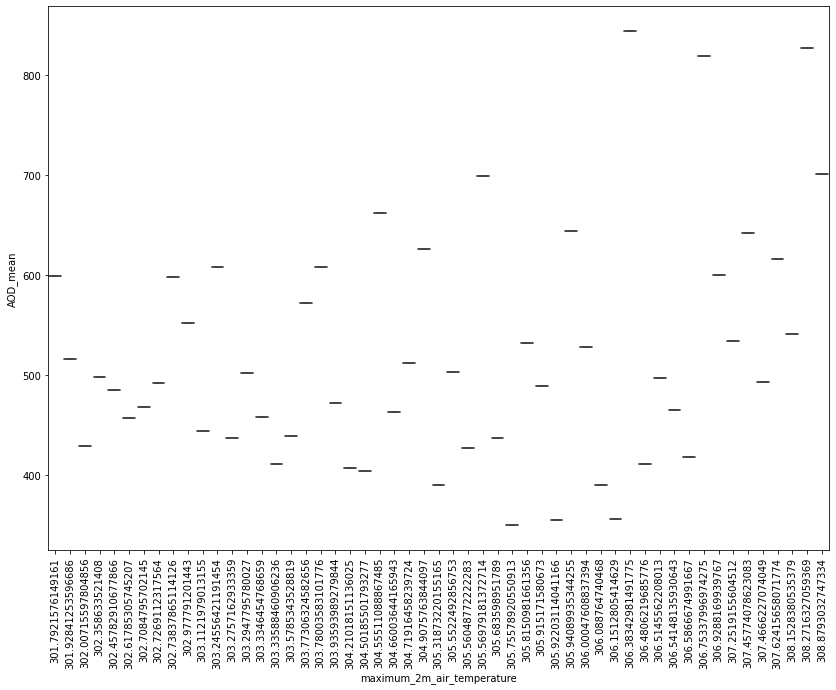

In [30]:
var = 'maximum_2m_air_temperature'
data = pd.concat([kerala_mg['AOD_mean'], kerala_mg[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 10))
fig = sns.boxplot(x=var, y="AOD_mean", data=data)
plt.xticks(rotation=90);

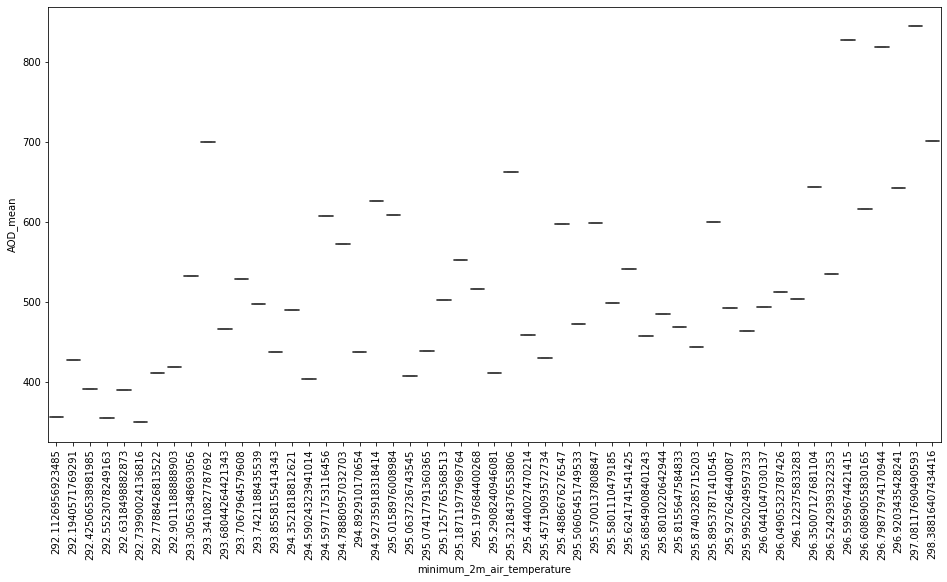

In [31]:
var = 'minimum_2m_air_temperature'
data = pd.concat([kerala_mg['AOD_mean'], kerala_mg[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="AOD_mean", data=data)
plt.xticks(rotation=90);

## Multivariate Analysis on variables Temperature & AOD

In [32]:
#calculating correlation matrix
corrmat = kerala_mg.corr(method='spearman')
corrmat

,maximum_2m_air_temperature,minimum_2m_air_temperature,AOD_mean
maximum_2m_air_temperature,1.000000,0.068860,0.207547
minimum_2m_air_temperature,0.068860,1.000000,0.582406
AOD_mean,0.207547,0.582406,1.000000


<AxesSubplot:>

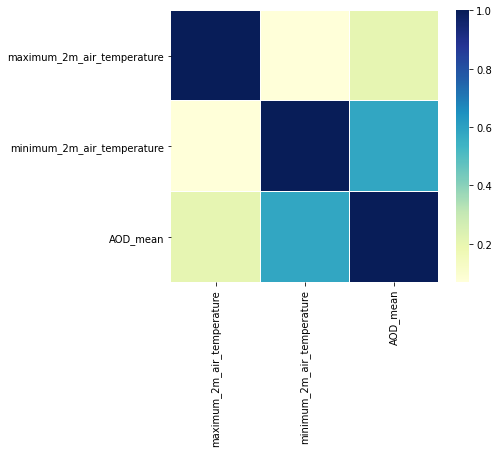

In [33]:
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

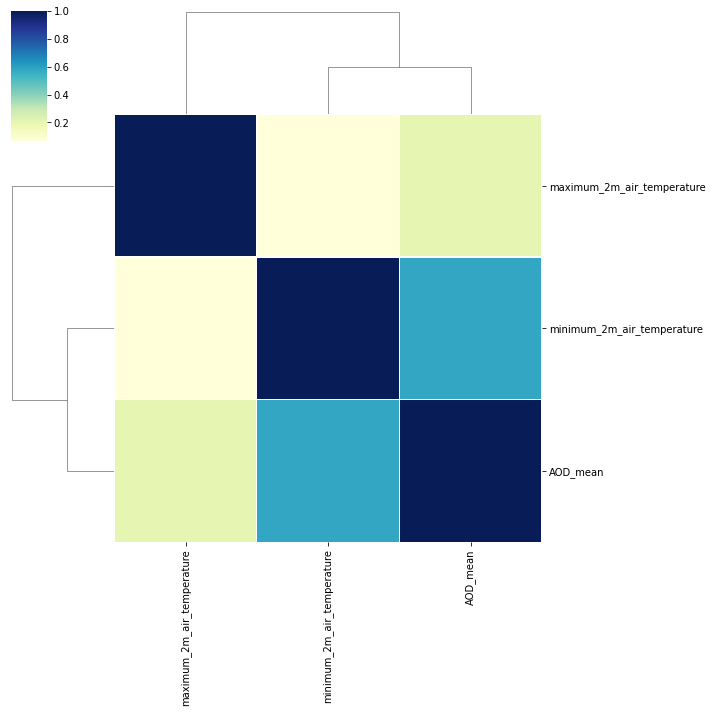

In [34]:
#Clustermap
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

array([[<AxesSubplot:xlabel='maximum_2m_air_temperature', ylabel='maximum_2m_air_temperature'>,
        <AxesSubplot:xlabel='minimum_2m_air_temperature', ylabel='maximum_2m_air_temperature'>,
        <AxesSubplot:xlabel='AOD_mean', ylabel='maximum_2m_air_temperature'>],
       [<AxesSubplot:xlabel='maximum_2m_air_temperature', ylabel='minimum_2m_air_temperature'>,
        <AxesSubplot:xlabel='minimum_2m_air_temperature', ylabel='minimum_2m_air_temperature'>,
        <AxesSubplot:xlabel='AOD_mean', ylabel='minimum_2m_air_temperature'>],
       [<AxesSubplot:xlabel='maximum_2m_air_temperature', ylabel='AOD_mean'>,
        <AxesSubplot:xlabel='minimum_2m_air_temperature', ylabel='AOD_mean'>,
        <AxesSubplot:xlabel='AOD_mean', ylabel='AOD_mean'>]], dtype=object)

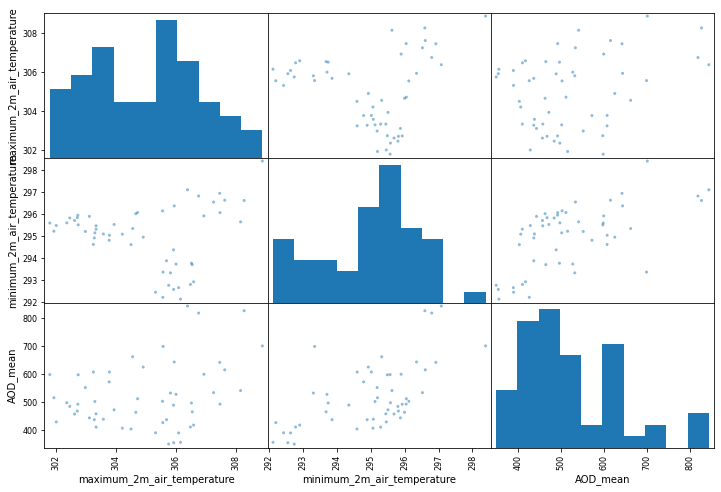

In [35]:
#Scatter plot
attributes = ["maximum_2m_air_temperature", "minimum_2m_air_temperature","AOD_mean"]
pd.plotting.scatter_matrix(kerala_mg[attributes], figsize=(12, 8))

# Multivariate Analysis

## Adding more datasets

In [36]:
#Import MODIS FIRE
fire = pd.read_csv("Fire_M_11.csv")
fire = fire[["DISTRICT","ST_NM","date","mean"]]
fire['mean'].astype('float64')
fire.head()

,DISTRICT,ST_NM,date,mean
0,Chandigarh,Chandigarh,01-01-2011,4.959541
1,Daman,Daman & Diu,01-01-2011,4.348247
2,Diu,Daman & Diu,01-01-2011,3.960225
3,Dadra & Nagar Haveli,Dadara & Nagar Havelli,01-01-2011,4.908496
4,North Goa,Goa,01-01-2011,4.861128


In [37]:
#Import MODIS_T
modis_t = pd.read_csv("MODIS_T1.csv")
modis_t = modis_t[["DISTRICT","ST_NM","date","mean"]]
modis_t.head()

,DISTRICT,ST_NM,date,mean
0,Lakshadweep,Lakshadweep,01-01-2010,15078.53794
1,Chandigarh,Chandigarh,01-01-2010,14616.60032
2,Dadra & Nagar Haveli,Dadara & Nagar Havelli,01-01-2010,15230.82283
3,Data Not Available,Jammu and Kashmir,01-01-2010,13181.65623
4,Srinagar,Jammu and Kashmir,01-01-2010,13584.62590


In [38]:
#Import VIIRS
viirs = pd.read_csv("VIIRS.csv")
viirs = viirs[["DISTRICT","ST_NM","date","mean"]]
viirs.head()

,DISTRICT,ST_NM,date,mean
0,North Goa,Goa,2014-01-01T00:00:00,1.878777
1,South Goa,Goa,2014-01-01T00:00:00,1.182568
2,Kamrup,Assam,2014-01-01T00:00:00,0.494211
3,Kamrup Metropolitan,Assam,2014-01-01T00:00:00,1.356170
4,Karbi Anglong,Assam,2014-01-01T00:00:00,0.137395


## Making column headings uniform

In [39]:
fire['ST_NM'] = fire['ST_NM'].str.upper()
fire = fire.rename(columns={'ST_NM':'STATE_UT','mean':'FIRE_mean'})
fire.head()

,DISTRICT,STATE_UT,date,FIRE_mean
0,Chandigarh,CHANDIGARH,01-01-2011,4.959541
1,Daman,DAMAN & DIU,01-01-2011,4.348247
2,Diu,DAMAN & DIU,01-01-2011,3.960225
3,Dadra & Nagar Haveli,DADARA & NAGAR HAVELLI,01-01-2011,4.908496
4,North Goa,GOA,01-01-2011,4.861128


In [40]:
modis_t['ST_NM'] = modis_t['ST_NM'].str.upper()
modis_t = modis_t.rename(columns={'ST_NM':'STATE_UT','mean':'MODIS_T_mean'})
modis_t.head()

,DISTRICT,STATE_UT,date,MODIS_T_mean
0,Lakshadweep,LAKSHADWEEP,01-01-2010,15078.53794
1,Chandigarh,CHANDIGARH,01-01-2010,14616.60032
2,Dadra & Nagar Haveli,DADARA & NAGAR HAVELLI,01-01-2010,15230.82283
3,Data Not Available,JAMMU AND KASHMIR,01-01-2010,13181.65623
4,Srinagar,JAMMU AND KASHMIR,01-01-2010,13584.62590


In [41]:
viirs['ST_NM'] = viirs['ST_NM'].str.upper()
viirs = viirs.rename(columns={'ST_NM':'STATE_UT','mean':'VIIRS_mean'})
viirs.head()

,DISTRICT,STATE_UT,date,VIIRS_mean
0,North Goa,GOA,2014-01-01T00:00:00,1.878777
1,South Goa,GOA,2014-01-01T00:00:00,1.182568
2,Kamrup,ASSAM,2014-01-01T00:00:00,0.494211
3,Kamrup Metropolitan,ASSAM,2014-01-01T00:00:00,1.356170
4,Karbi Anglong,ASSAM,2014-01-01T00:00:00,0.137395


## Formatting Date field

In [42]:
fire['date'] = pd.to_datetime(fire["date"]).dt.strftime('%Y-%m-%d')
fire

,DISTRICT,STATE_UT,date,FIRE_mean
0,Chandigarh,CHANDIGARH,2011-01-01,4.959541
1,Daman,DAMAN & DIU,2011-01-01,4.348247
2,Diu,DAMAN & DIU,2011-01-01,3.960225
3,Dadra & Nagar Haveli,DADARA & NAGAR HAVELLI,2011-01-01,4.908496
4,North Goa,GOA,2011-01-01,4.861128
...,...,...,...,...
69219,Yanam,PUDUCHERRY,2019-12-01,4.108330
69220,Mahe,PUDUCHERRY,2019-12-01,4.657529
69221,Nicobar,ANDAMAN & NICOBAR ISLAND,2019-12-01,4.476430
69222,South Andaman,ANDAMAN & NICOBAR ISLAND,2019-12-01,4.602567


In [43]:
modis_t['date'] = pd.to_datetime(modis_t["date"]).dt.strftime('%Y-%m-%d')
modis_t

,DISTRICT,STATE_UT,date,MODIS_T_mean
0,Lakshadweep,LAKSHADWEEP,2010-01-01,15078.53794
1,Chandigarh,CHANDIGARH,2010-01-01,14616.60032
2,Dadra & Nagar Haveli,DADARA & NAGAR HAVELLI,2010-01-01,15230.82283
3,Data Not Available,JAMMU AND KASHMIR,2010-01-01,13181.65623
4,Srinagar,JAMMU AND KASHMIR,2010-01-01,13584.62590
...,...,...,...,...
71826,Karaikal,PUDUCHERRY,2019-12-01,15006.40553
71827,Mahe,PUDUCHERRY,2019-12-01,15139.70086
71828,Pondicherry,PUDUCHERRY,2019-12-01,15001.40054
71829,Nicobars,ANDAMAN & NICOBAR ISLAND,2019-12-01,14896.11822


In [44]:
viirs['date'] = pd.to_datetime(viirs["date"]).dt.strftime('%Y-%m-%d')
viirs

,DISTRICT,STATE_UT,date,VIIRS_mean
0,North Goa,GOA,2014-01-01,1.878777
1,South Goa,GOA,2014-01-01,1.182568
2,Kamrup,ASSAM,2014-01-01,0.494211
3,Kamrup Metropolitan,ASSAM,2014-01-01,1.356170
4,Karbi Anglong,ASSAM,2014-01-01,0.137395
...,...,...,...,...
43583,East Siang,ARUNANCHAL PRADESH,2019-08-01,0.145169
43584,Dadra & Nagar Haveli,DADARA & NAGAR HAVELLI,2019-08-01,1.858002
43585,Nicobar,ANDAMAN & NICOBAR ISLAND,2019-08-01,0.086124
43586,South Andaman,ANDAMAN & NICOBAR ISLAND,2019-08-01,0.195205


## Cropping datasets to common date range

In [45]:
start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2019-08-01')

In [46]:
fire['date'] = pd.to_datetime(fire['date'])
fire_14_19 = crop(fire,start,end)
fire_14_19

,DISTRICT,STATE_UT,date,FIRE_mean
23074,Daman,DAMAN & DIU,2014-01-01,4.331323
23075,Diu,DAMAN & DIU,2014-01-01,3.980987
23076,Dadra & Nagar Haveli,DADARA & NAGAR HAVELLI,2014-01-01,4.909962
23077,South Goa,GOA,2014-01-01,4.846285
23078,North Goa,GOA,2014-01-01,4.838598
...,...,...,...,...
66655,Yanam,PUDUCHERRY,2019-08-01,4.042016
66656,Mahe,PUDUCHERRY,2019-08-01,4.314244
66657,Nicobar,ANDAMAN & NICOBAR ISLAND,2019-08-01,4.218480
66658,South Andaman,ANDAMAN & NICOBAR ISLAND,2019-08-01,4.156517


In [47]:
modis_t['date'] = pd.to_datetime(modis_t['date'])
modis_t_14_19 = crop(modis_t,start,end)
modis_t_14_19

,DISTRICT,STATE_UT,date,MODIS_T_mean
28495,Jammu,JAMMU AND KASHMIR,2014-01-01,14493.62540
28496,Kargil,JAMMU AND KASHMIR,2014-01-01,12988.45769
28497,Kathua,JAMMU AND KASHMIR,2014-01-01,14378.00039
28498,Leh (Ladakh),JAMMU AND KASHMIR,2014-01-01,13213.94122
28499,Kupwara,JAMMU AND KASHMIR,2014-01-01,13547.47711
...,...,...,...,...
68856,Karaikal,PUDUCHERRY,2019-08-01,15551.10567
68857,Mahe,PUDUCHERRY,2019-08-01,14915.93462
68858,Pondicherry,PUDUCHERRY,2019-08-01,15374.63306
68859,Nicobars,ANDAMAN & NICOBAR ISLAND,2019-08-01,14867.33802


In [48]:
viirs['date'] = pd.to_datetime(viirs['date'])
viirs_14_19 = crop(viirs,start,end)
viirs_14_19

,DISTRICT,STATE_UT,date,VIIRS_mean
0,North Goa,GOA,2014-01-01,1.878777
1,South Goa,GOA,2014-01-01,1.182568
2,Kamrup,ASSAM,2014-01-01,0.494211
3,Kamrup Metropolitan,ASSAM,2014-01-01,1.356170
4,Karbi Anglong,ASSAM,2014-01-01,0.137395
...,...,...,...,...
43583,East Siang,ARUNANCHAL PRADESH,2019-08-01,0.145169
43584,Dadra & Nagar Haveli,DADARA & NAGAR HAVELLI,2019-08-01,1.858002
43585,Nicobar,ANDAMAN & NICOBAR ISLAND,2019-08-01,0.086124
43586,South Andaman,ANDAMAN & NICOBAR ISLAND,2019-08-01,0.195205


## Grouping data by State

In [49]:
fire_st_avg = fire_14_19.groupby(["STATE_UT","date"]).mean().reset_index()
fire_st_avg

,STATE_UT,date,FIRE_mean
0,ANDAMAN & NICOBAR ISLAND,2014-01-01,4.577882
1,ANDAMAN & NICOBAR ISLAND,2014-01-02,4.595515
2,ANDAMAN & NICOBAR ISLAND,2014-01-03,4.611182
3,ANDAMAN & NICOBAR ISLAND,2014-01-04,4.584401
4,ANDAMAN & NICOBAR ISLAND,2014-01-05,4.421181
...,...,...,...
2374,WEST BENGAL,2019-04-01,4.851149
2375,WEST BENGAL,2019-05-01,4.816275
2376,WEST BENGAL,2019-06-01,4.722280
2377,WEST BENGAL,2019-07-01,4.535343


In [50]:
modis_t_st_avg = modis_t_14_19.groupby(["STATE_UT","date"]).mean().reset_index()
modis_t_st_avg

,STATE_UT,date,MODIS_T_mean
0,ANDAMAN & NICOBAR ISLAND,2014-01-01,14947.220610
1,ANDAMAN & NICOBAR ISLAND,2014-02-01,15015.421715
2,ANDAMAN & NICOBAR ISLAND,2014-03-01,15156.951025
3,ANDAMAN & NICOBAR ISLAND,2014-04-01,15116.526310
4,ANDAMAN & NICOBAR ISLAND,2014-05-01,15060.565945
...,...,...,...
2374,WEST BENGAL,2019-04-01,15216.709021
2375,WEST BENGAL,2019-05-01,15238.805160
2376,WEST BENGAL,2019-06-01,15245.371621
2377,WEST BENGAL,2019-07-01,15216.224519


In [51]:
viirs_st_avg = viirs_14_19.groupby(["STATE_UT","date"]).mean().reset_index()
viirs_st_avg

,STATE_UT,date,VIIRS_mean
0,ANDAMAN & NICOBAR ISLAND,2014-01-01,0.030793
1,ANDAMAN & NICOBAR ISLAND,2014-02-01,0.062856
2,ANDAMAN & NICOBAR ISLAND,2014-03-01,0.144115
3,ANDAMAN & NICOBAR ISLAND,2014-04-01,0.230543
4,ANDAMAN & NICOBAR ISLAND,2014-05-01,0.164383
...,...,...,...
2375,WEST BENGAL,2019-04-01,3.628759
2376,WEST BENGAL,2019-05-01,3.644170
2377,WEST BENGAL,2019-06-01,3.396657
2378,WEST BENGAL,2019-07-01,3.168932


In [52]:
aod_14_19 = crop(aod, start, end)
aod_14_19.head()

,DISTRICT,STATE_UT,date,AOD_mean
22998,Chandigarh,CHANDIGARH,2014-01-01,544.833369
22999,Daman,DAMAN & DIU,2014-01-01,556.314695
23000,Diu,DAMAN & DIU,2014-01-01,407.604617
23001,Dadra & Nagar Haveli,DADARA & NAGAR HAVELLI,2014-01-01,564.989522
23002,North Goa,GOA,2014-01-01,471.098864


In [53]:
aod_st_avg = aod_14_19.groupby(["STATE_UT","date"]).mean().reset_index()
aod_st_avg

,STATE_UT,date,AOD_mean
0,ANDAMAN & NICOBAR ISLAND,2014-01-01,314.383253
1,ANDAMAN & NICOBAR ISLAND,2014-04-01,420.678703
2,ANDAMAN & NICOBAR ISLAND,2014-07-01,473.587284
3,ANDAMAN & NICOBAR ISLAND,2014-10-01,334.765279
4,ANDAMAN & NICOBAR ISLAND,2015-01-01,271.589136
...,...,...,...
794,WEST BENGAL,2018-07-01,706.043374
795,WEST BENGAL,2018-10-01,655.586612
796,WEST BENGAL,2019-01-01,856.090348
797,WEST BENGAL,2019-04-01,751.726200


In [54]:
temp_14_19 = crop(temp, start, end)
temp_14_19.head()

,NAME,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature
266832,DADRA_&_NAGAR_HAVELI,DADRA_&_NAGAR_HAVELI,2014-01-01,304.235287,287.003654
266833,DIU,DAMAN_&_DIU,2014-01-01,300.765686,288.699585
266834,DAMAN,DAMAN_&_DIU,2014-01-01,299.762756,290.385345
266835,DELHI,DELHI,2014-01-01,295.885219,278.461633
266836,CHANDIGARH,CHANDIGARH,2014-01-01,294.892632,276.424169


In [55]:
temp_st_avg = temp_14_19.groupby(["STATE_UT","date"]).mean().reset_index()
temp_st_avg

,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature
0,ANDAMAN_&_NICOBAR_IS,2014-01-01,300.904960,297.076989
1,ANDAMAN_&_NICOBAR_IS,2014-02-01,301.333806,296.781254
2,ANDAMAN_&_NICOBAR_IS,2014-03-01,302.650367,298.566905
3,ANDAMAN_&_NICOBAR_IS,2014-04-01,303.528024,298.938379
4,ANDAMAN_&_NICOBAR_IS,2014-05-01,303.648778,299.066455
...,...,...,...,...
2171,WEST_BENGAL,2019-04-01,308.346809,295.338028
2172,WEST_BENGAL,2019-05-01,307.943529,298.055337
2173,WEST_BENGAL,2019-06-01,308.843099,298.906054
2174,WEST_BENGAL,2019-07-01,307.582889,299.542941


## Merging Datasets

In [56]:
merged_DF1 = pd.merge(temp_st_avg, aod_st_avg, how ='inner', on = ['date','STATE_UT'])
merged_DF1

,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature,AOD_mean
0,ASSAM,2014-01-01,299.935773,281.340041,560.795007
1,ASSAM,2014-04-01,310.033014,290.121570,639.632170
2,ASSAM,2014-07-01,307.151614,297.778978,370.528395
3,ASSAM,2014-10-01,306.437151,290.510871,274.555910
4,ASSAM,2015-01-01,299.671036,282.210833,432.572036
...,...,...,...,...,...
384,TRIPURA,2018-07-01,310.384685,298.118351,418.149505
385,TRIPURA,2018-10-01,307.716190,292.989533,639.693171
386,TRIPURA,2019-01-01,303.166515,284.013474,408.423306
387,TRIPURA,2019-04-01,310.310170,291.448304,774.475497


In [57]:
merged_DF2 = pd.merge(fire_st_avg, modis_t_st_avg, how ='inner', on = ['date','STATE_UT'])
merged_DF2

,STATE_UT,date,FIRE_mean,MODIS_T_mean
0,ANDAMAN & NICOBAR ISLAND,2014-01-01,4.577882,14947.220610
1,ANDAMAN & NICOBAR ISLAND,2015-01-01,4.568145,14971.602410
2,ANDAMAN & NICOBAR ISLAND,2016-01-01,4.581978,14980.149950
3,ANDAMAN & NICOBAR ISLAND,2017-01-01,4.394173,14884.947260
4,ANDAMAN & NICOBAR ISLAND,2018-01-01,4.496612,14912.351750
...,...,...,...,...
410,WEST BENGAL,2019-04-01,4.851149,15216.709021
411,WEST BENGAL,2019-05-01,4.816275,15238.805160
412,WEST BENGAL,2019-06-01,4.722280,15245.371621
413,WEST BENGAL,2019-07-01,4.535343,15216.224519


In [58]:
merged_DF3 = pd.merge(merged_DF1, viirs_st_avg, how ='inner', on = ['date','STATE_UT'])
merged_DF3

,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature,AOD_mean,VIIRS_mean
0,ASSAM,2014-01-01,299.935773,281.340041,560.795007,0.545741
1,ASSAM,2014-04-01,310.033014,290.121570,639.632170,0.627030
2,ASSAM,2014-07-01,307.151614,297.778978,370.528395,0.409764
3,ASSAM,2014-10-01,306.437151,290.510871,274.555910,0.765632
4,ASSAM,2015-01-01,299.671036,282.210833,432.572036,0.810954
...,...,...,...,...,...,...
384,TRIPURA,2018-07-01,310.384685,298.118351,418.149505,0.641043
385,TRIPURA,2018-10-01,307.716190,292.989533,639.693171,1.105330
386,TRIPURA,2019-01-01,303.166515,284.013474,408.423306,0.822663
387,TRIPURA,2019-04-01,310.310170,291.448304,774.475497,0.663686


In [59]:
merged_DF = pd.merge(merged_DF3, merged_DF2, how ='inner', on = ['date','STATE_UT'])
merged_DF

,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature,AOD_mean,VIIRS_mean,FIRE_mean,MODIS_T_mean
0,ASSAM,2014-01-01,299.935773,281.340041,560.795007,0.545741,4.838489,14796.921761
1,ASSAM,2015-01-01,299.671036,282.210833,432.572036,0.810954,4.832151,14818.030245
2,ASSAM,2016-01-01,298.103176,281.622304,686.204299,0.541785,4.822742,14723.930568
3,ASSAM,2017-01-01,301.126162,281.157681,448.426223,0.772384,4.840142,14822.190527
4,ASSAM,2018-01-01,298.769185,281.138029,736.752879,0.687359,4.840266,14740.428194
...,...,...,...,...,...,...,...,...
130,TRIPURA,2017-01-01,303.388880,281.512113,454.315000,0.781329,4.965363,14818.337912
131,TRIPURA,2018-01-01,299.206752,281.182864,843.763140,0.747592,4.951536,14733.039000
132,TRIPURA,2019-01-01,303.166515,284.013474,408.423306,0.822663,4.960174,14829.939328
133,TRIPURA,2019-04-01,310.310170,291.448304,774.475497,0.663686,4.927582,15174.009178


## Multivariate analysis on 5 Datasets

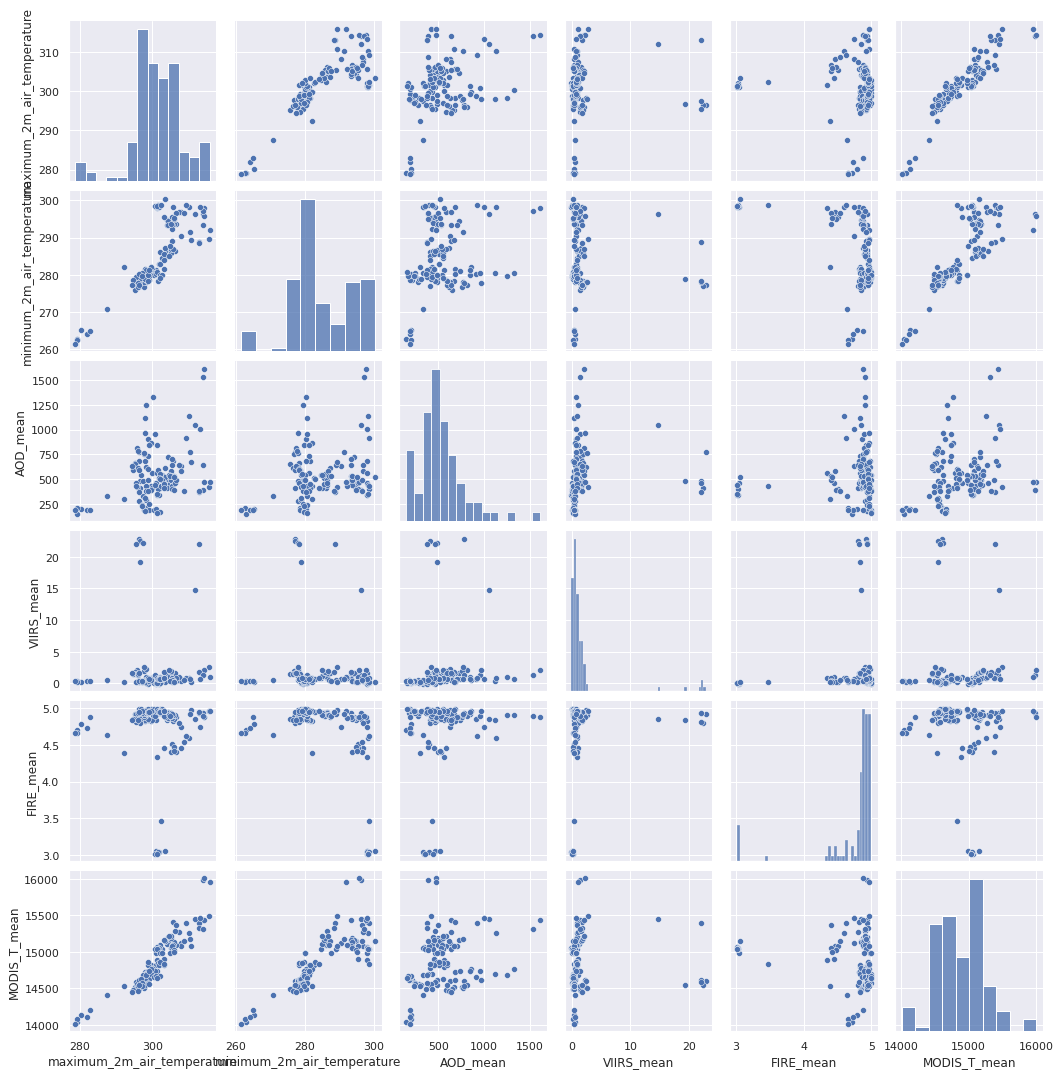

In [60]:
sns.set()
cols = ['maximum_2m_air_temperature', 'minimum_2m_air_temperature', 'AOD_mean', 'VIIRS_mean', 'FIRE_mean', 'MODIS_T_mean']
sns.pairplot(merged_DF[cols], height = 2.5)
plt.show();

## Correlation Analysis

In [61]:
#Calculating correlation
corrmat = merged_DF.corr(method='spearman')
print("Descriptive Analysis in form of Correlation Matrix")
corrmat

Descriptive Analysis in form of Correlation Matrix


,maximum_2m_air_temperature,minimum_2m_air_temperature,AOD_mean,VIIRS_mean,FIRE_mean,MODIS_T_mean
maximum_2m_air_temperature,1.000000,0.823642,0.230280,0.190737,-0.065072,0.941230
minimum_2m_air_temperature,0.823642,1.000000,0.152746,-0.051746,-0.390581,0.848761
AOD_mean,0.230280,0.152746,1.000000,0.496293,-0.048820,0.260170
VIIRS_mean,0.190737,-0.051746,0.496293,1.000000,0.058799,0.276588
FIRE_mean,-0.065072,-0.390581,-0.048820,0.058799,1.000000,-0.121632
MODIS_T_mean,0.941230,0.848761,0.260170,0.276588,-0.121632,1.000000


<AxesSubplot:>

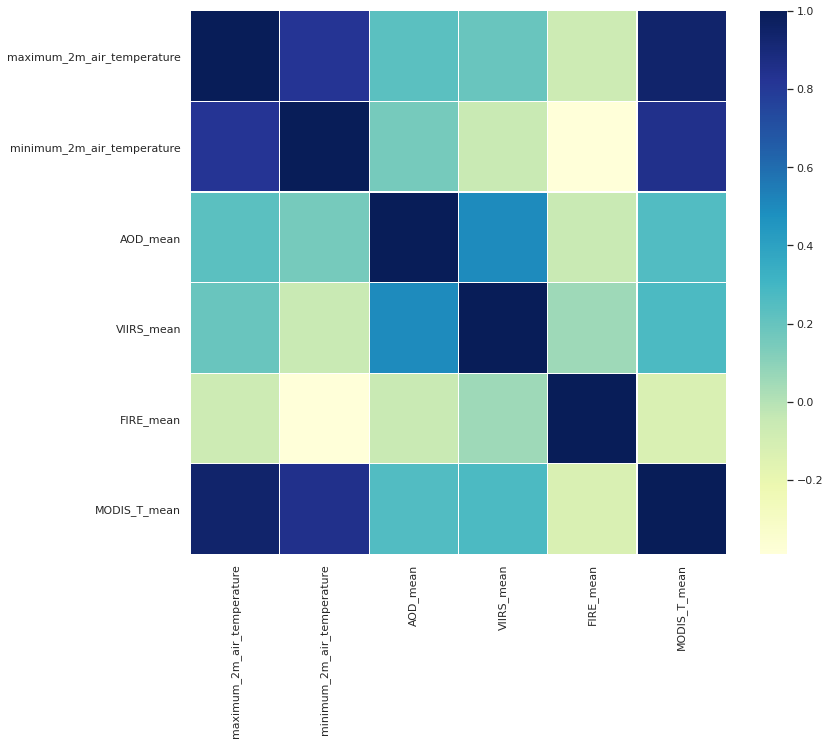

In [62]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

MODIS_T(Surface Temperature) and Maximum and Minimum air temperature is obviously correlated very much. Rest of them are not related much. Next highest correlated variable with temperature is AOD_mean and VIIRS(Night Light). This vague correlation with VIIRS is not of much importance

<AxesSubplot:xlabel='MODIS_T_mean', ylabel='maximum_2m_air_temperature'>

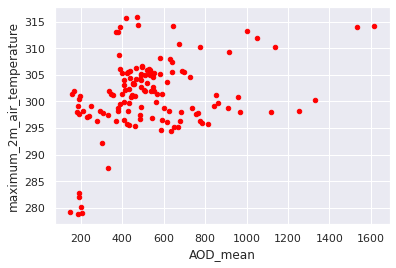

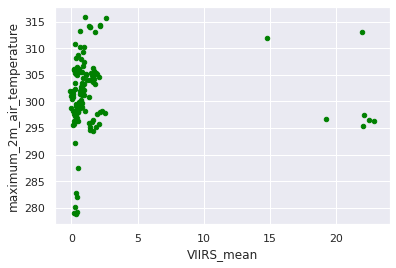

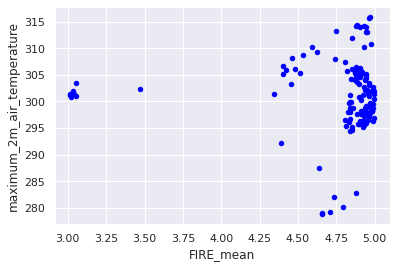

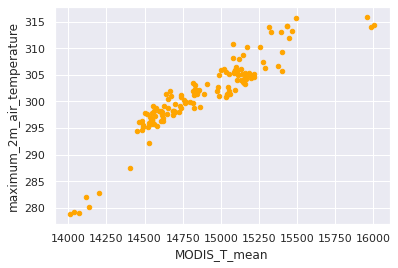

In [63]:
merged_DF.plot.scatter(x='AOD_mean', y='maximum_2m_air_temperature', c="red")
merged_DF.plot.scatter(x='VIIRS_mean', y='maximum_2m_air_temperature', c="green")
merged_DF.plot.scatter(x='FIRE_mean', y='maximum_2m_air_temperature', c="blue")
merged_DF.plot.scatter(x='MODIS_T_mean', y='maximum_2m_air_temperature', c="orange")